In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


# Importing Data

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

> we've found that no column is object and ther is no missing data and there are (284807 rows) and (31 columns)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# checking if there are any duplicate rows in the DataFrame
df.duplicated().any()

True

In [7]:
# Drop the duplicate rows from the DataFrame
df = df.drop_duplicates()
#Reset index
df = df.reset_index(drop=True)

In [8]:
#checking that all duplicate rows is dropped
df.duplicated().any()

False

> there aren't any duplicate rows

In [9]:
# checking if the target('Class') data is balanced or imbalanced data
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

> This is imbalance data and need ro make sampling

# copy of data

In [10]:
# taking a copy of data
df2=df.copy()

# Data Analysis & Visualization

# Distribution of Transaction Time

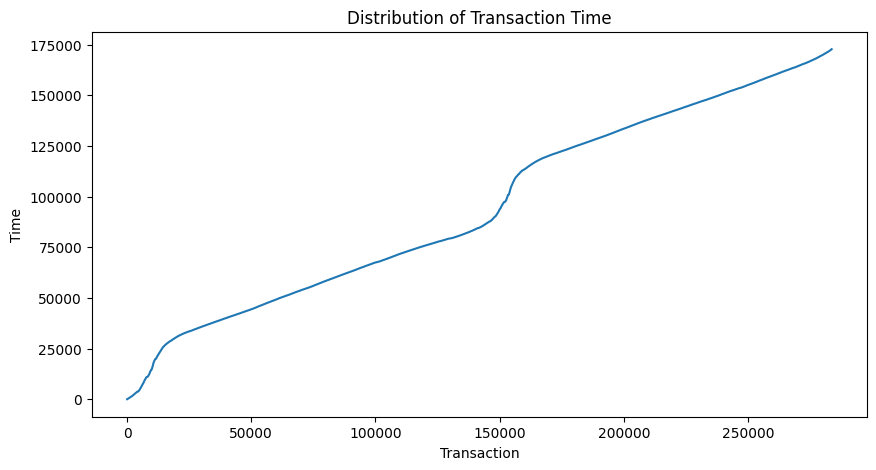

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df2.index,df2["Time"])
plt.xlabel("Transaction")
plt.ylabel("Time")
plt.title("Distribution of Transaction Time")
plt.show()

# Distribution of Transaction Amount

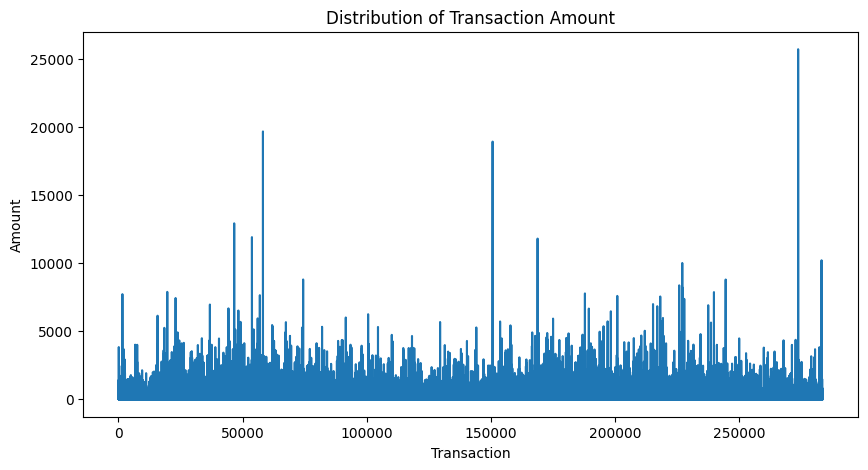

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df2.index,df2["Amount"])
plt.xlabel("Transaction")
plt.ylabel("Amount")
plt.title("Distribution of Transaction Amount")
plt.show()

# Correlated columns with Class

In [13]:
corr = df2.corr()
c=corr['Class'].sort_values(ascending=False)
print(c)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


> We've found that V11 is Max positive correlation and V17 is Max negative correlation

In [14]:
# value of 1 in the "Class" column indicates (fraud) transactions
fraud=df2[df2["Class"]==1]
# value of 0 in the "Class" column indicates (real) transactions
real=df2[df2["Class"]==0]

# Relationship between Time and Max positive correlation(V11)

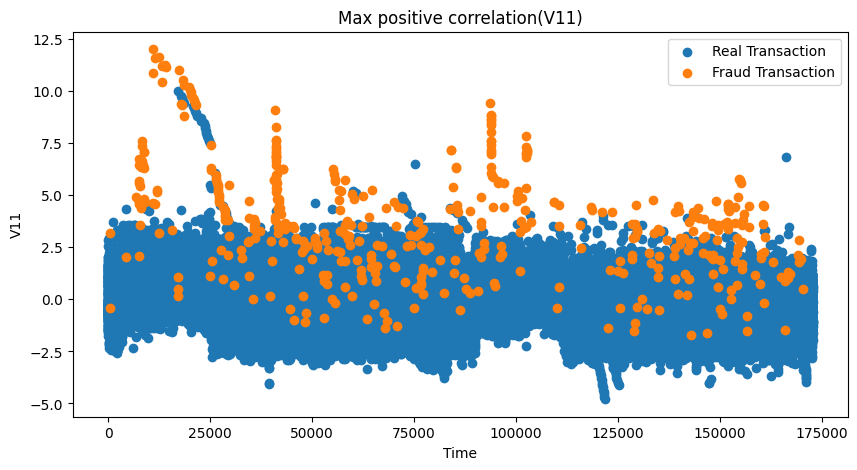

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(real["Time"],real["V11"],label="Real Transaction")
plt.scatter(fraud["Time"],fraud["V11"],label="Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("V11")
plt.title("Max positive correlation(V11)")
plt.legend()
plt.show()

# Relationship between Time and Max negative correlation(V17)

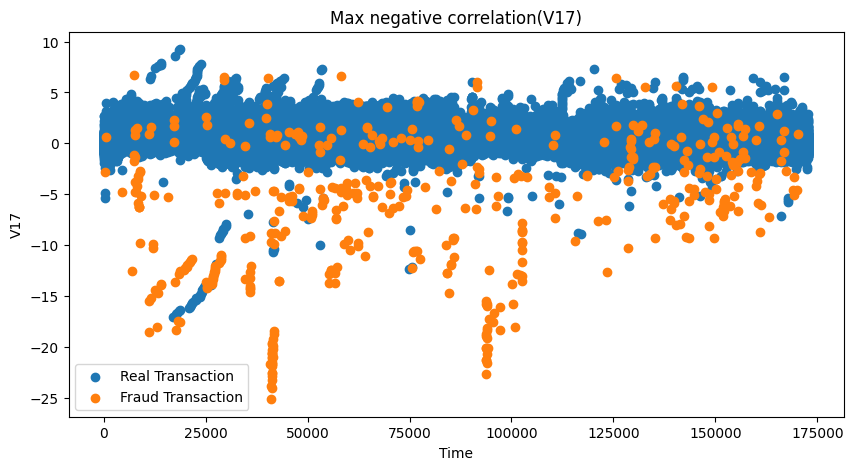

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(real["Time"],real["V17"],label="Real Transaction")
plt.scatter(fraud["Time"],fraud["V17"],label="Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("V17")
plt.title("Max negative correlation(V17)")
plt.legend()
plt.show()

# performing standard scaling

In [17]:
from sklearn.preprocessing import StandardScaler
# standardizes the 'Amount' column in the DataFrame 
df2['amount'] = StandardScaler().fit_transform(df2['Amount'].values.reshape(-1,1))
# standardizes the 'Tine' column in the DataFrame 
df2['time'] = StandardScaler().fit_transform(df2['Time'].values.reshape(-1,1))
# Removng this non-scaling columns
df2.drop(['Time','Amount'], axis=1, inplace=True)
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount,time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350252,1.642235
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254325,1.642257
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.082239,1.642278
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313391,1.642278


# Selecting the Features

In [18]:
X = df2.drop('Class', axis=1)
Y = df2['Class']

# Sampiling for data

In [19]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, Y)

# Data Spliting

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_undersampled,y_undersampled, test_size = 0.25, random_state=42)

# Data Modeling

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classifcation_report_logistic = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_logistic)

Accuracy: 0.9409282700421941
F1 Score: 0.9409345802255681
Precision: 0.9421475578770925
Recall: 0.9409282700421941
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       115
           1       0.97      0.92      0.94       122

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237



# confusion matrix for model performance assessment

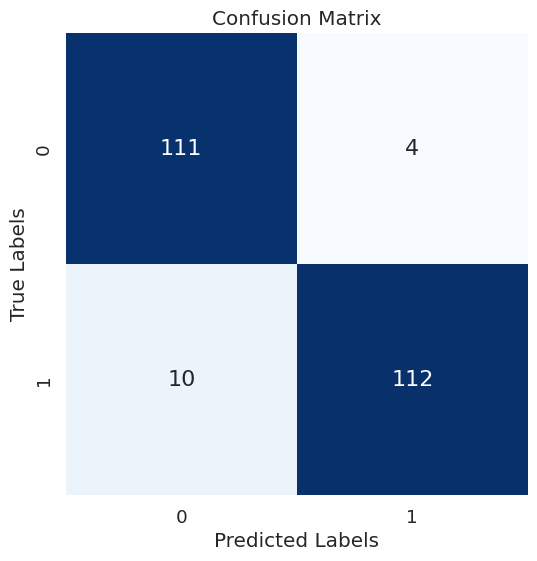

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)

# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

#  Decision Tree

Accuracy: 0.9493670886075949
F1 Score: 0.9493598769694532
Precision: 0.9515192220543125
Recall: 0.9493670886075949
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       115
           1       0.98      0.92      0.95       122

    accuracy                           0.95       237
   macro avg       0.95      0.95      0.95       237
weighted avg       0.95      0.95      0.95       237



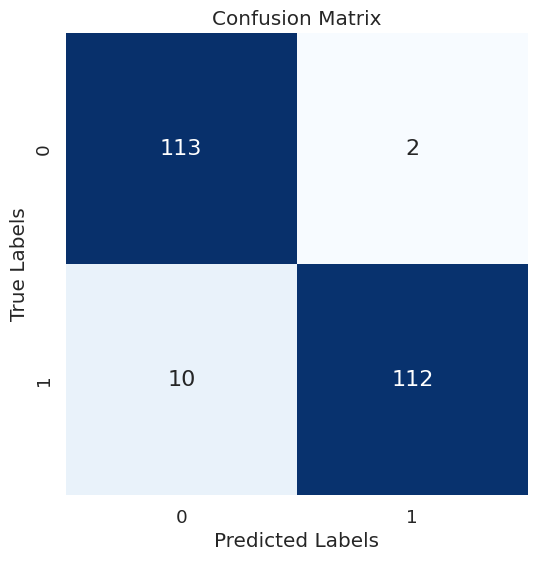

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=3,random_state=42)
# Train the model
tree.fit(X_train,y_train)
# Make predictions on the test set
y_prediction_tree = tree.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test, y_prediction_tree)
f1 = f1_score(y_test, y_prediction_tree, average='weighted')
precision = precision_score(y_test,y_prediction_tree, average='weighted')
recall = recall_score(y_test, y_prediction_tree, average='weighted')
classifcation_report_ = classification_report(y_test, y_prediction_tree)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_)
# confusion matrix for model performance assessment
cm = confusion_matrix(y_test,y_prediction_tree)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

# Random Forest

Accuracy: 0.9535864978902954
F1 Score: 0.9535864978902954
Precision: 0.9552517059585998
Recall: 0.9535864978902954
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       115
           1       0.98      0.93      0.95       122

    accuracy                           0.95       237
   macro avg       0.95      0.95      0.95       237
weighted avg       0.96      0.95      0.95       237



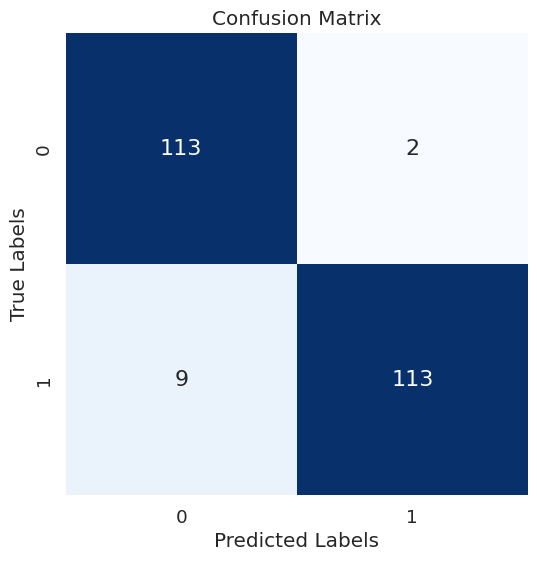

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Initialize RandomFores Classifier
rf = RandomForestClassifier(random_state=42)
# train the model
rf.fit(X_train,y_train)
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test,y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')
precision = precision_score(y_test,y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
classifcation_report_ = classification_report(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_)
# confusion matrix for model performance assessment
cm = confusion_matrix(y_test,y_pred_rf)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

# xgboost

Accuracy: 0.9493670886075949
F1 Score: 0.9493598769694532
Precision: 0.9515192220543125
Recall: 0.9493670886075949
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       115
           1       0.98      0.92      0.95       122

    accuracy                           0.95       237
   macro avg       0.95      0.95      0.95       237
weighted avg       0.95      0.95      0.95       237



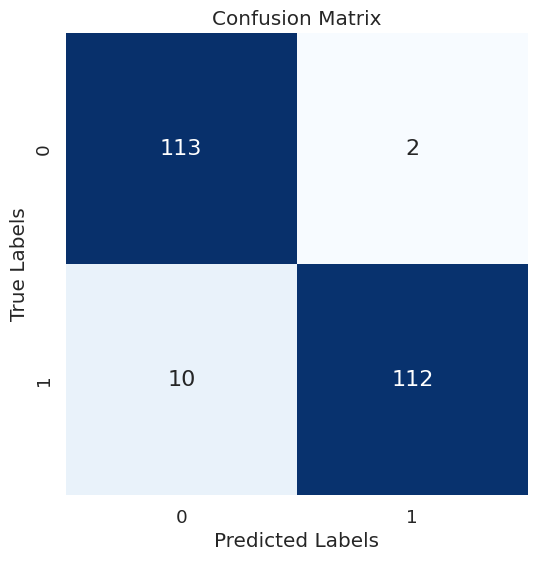

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier
# Initialize xgb Classifier
xgb_classifier = xgb.XGBClassifier ( n_estimators=200,learning_rate=0.1, max_depth=7,random_state=42)
xgb_classifier.fit(X_train,y_train)
# Make predictions on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test,y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
precision = precision_score(y_test,y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
classifcation_report_ = classification_report(y_test, y_pred_xgb)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_)
# confusion matrix for model performance assessment
cm = confusion_matrix(y_test,y_pred_xgb)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()

# SVM

Accuracy: 0.9367088607594937
F1 Score: 0.9366592675030945
Precision: 0.9406612761043142
Recall: 0.9367088607594937
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       115
           1       0.98      0.89      0.94       122

    accuracy                           0.94       237
   macro avg       0.94      0.94      0.94       237
weighted avg       0.94      0.94      0.94       237



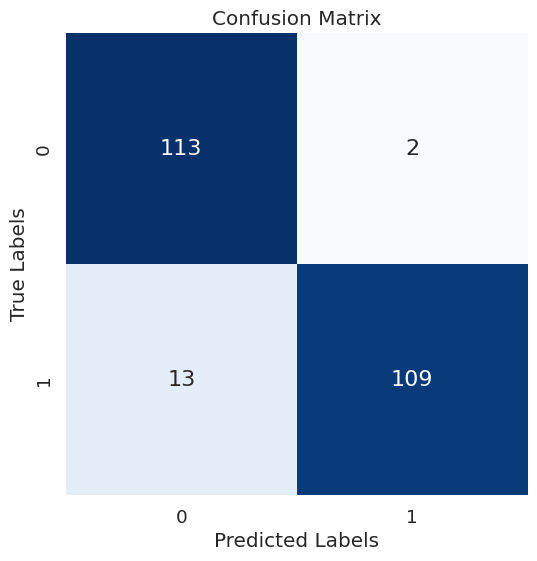

In [27]:
from sklearn.svm import SVC
# Initialize SVM Classifier
svm_classifier = SVC( kernel='rbf', random_state=42)
# Train the SVM classifier on the training data
svm_classifier.fit(X_train,y_train)
# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)
# Evaluate the model with  accuracy, F1 score, precision and recall
accuracy = accuracy_score(y_test,y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='weighted')
precision = precision_score(y_test,y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
classifcation_report_ = classification_report(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:")
print(classifcation_report_)
# confusion matrix for model performance assessment
cm = confusion_matrix(y_test,y_pred_svm)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False, square=True)
# Add labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# Show the plot
plt.show()